# 1. 필요 패키지 설치

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers
!pip install torch
!pip install transformers
!pip install 'git+https://github.com/SKTBrain/KoBERT.git#egg=kobert_tokenizer&subdirectory=kobert_hf'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp310-cp310-linux_x86_64.whl size=661763 sha256=220418e5a0a5d7bc6d20a3218a83beb0838b02606fd1a76906378d5964cccd38
  Stored in directory: /root/.cache/pip/wheels/1a/1e/0d/99f55911d90f2b95b9f7c176d5813ef3622894a4b30fde6bd3
Successfully built gluonnlp
  Cloning https://github.com/SKTBrain/KoBERT.git to /tmp/pip-install-_u60o5le/kobert-tokenizer_47df017b8d9e4e9bb6327e8897fb8f1e
  Running command git clone --filter=blob:none --quiet https://github.com/SKTBrain/KoBERT.git /tmp/pip-install-_u60o5le/kobert-tokenizer_47df017b8d9e4e9bb6327e8897fb8f1e
  Resolved https://github.com/SK

In [ ]:
pip install numpy torch torchvision torchaudio --force-reinstall --index-url https://download.pytorch.org/whl/cu117


In [ ]:
# google drive 실행
from google.colab import drive
drive.mount('/content/drive')

# 2. 데이터 불러오기 & 전처리

In [ ]:
import pandas as pd
test_df = pd.read_csv('/content/drive/MyDrive/final_test.csv' )
train_df = pd.read_csv('/content/drive/MyDrive/final_train.csv')

In [ ]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# 여기서부터 파일탐색 전처리
test_df["GeneralPolarity"].isnull().sum()
train_df["GeneralPolarity"].isnull().sum()

test_df.dropna(inplace=True)
train_df.dropna(inplace=True)

In [ ]:
train_df.GeneralPolarity

2         0.0
3         0.0
4         0.0
6         0.0
8         0.0
         ... 
200799    0.0
200800    1.0
200801    1.0
200814    1.0
200815    1.0
Name: GeneralPolarity, Length: 172777, dtype: float64

In [ ]:
# 1은 긍정 -1는 부정 0은 중립!
test_df["GeneralPolarity"] = test_df["GeneralPolarity"].apply(lambda x:int(x))
train_df["GeneralPolarity"] = train_df["GeneralPolarity"].apply(lambda x:int(x))



In [ ]:
# 긍정 : 2, 중립 : 1, 부정 : 0으로 GeneralPolarity값 변경
train_df.GeneralPolarity = train_df.GeneralPolarity+1
test_df.GeneralPolarity = test_df.GeneralPolarity+1

In [ ]:
# GeneralPolarity가 잘 바뀌었는지 확인
train_df.GeneralPolarity.unique()
test_df.GeneralPolarity.unique()

In [ ]:
# 학습에 필요한 필요 feature 선택
# 학습에 용이하게 dataframe을 list형태로 변환

train_list = []
for review, label in zip(train_df['RawText'], train_df['GeneralPolarity']):
  data = []
  data.append(review)
  data.append(label)
  train_list.append(data)
len(train_list)

train_list

test_list = []
for review, label in zip(test_df['RawText'], test_df['GeneralPolarity']):
  data = []
  data.append(review)
  data.append(label)
  test_list.append(data)
len(test_list)

test_list

# test_df.to_csv("test.csv")
# train_df.to_csv("train.csv")

# train_df.to_csv('/content/drive/MyDrive/train_data.tsv', sep='\t')
# test_df.to_csv('/content/drive/MyDrive/test_data.tsv', sep='\t')

[['사이즈가 크게 나왔으니 꼭~~확인하세요. 제가 엉덩이와 허벅지가 굵어서 사이즈를 크게 입는데 요번 제품은 정사이즈를 입어도 편하게 이쁘네요.항상 바지는 엉덩이에 맞추느라 허리는 크게 입는데 요녀석 사이즈가 제 허리를 맞춰주네요. 깔끔 포장과 무난한 색상 ,빠른 배송 굿입니다요',
  2],
 ['정사이즈보다 한치수 적게 주문했더니 너무 잘맞고 입기 편하고 시원합니다..', 2],
 ['한싸이즈 작은걸로 주문 했더니 잘맞네요  올여름 시원할것같네요 허리에 고무닫는느낌은  과히 좋지는  안네요', 1],
 ['바지 핏은 진짜 이쁘ㅗ 원단도 진짜 좋은데 허리부분에서 너무 느슨하고 입으면 내려오니  좀 그 부분만 아쉽고 가격에비해 아즌좋아요',
  1],
 ['신축성도 있고 좋네요 30 을 입는데 상품평에 옷이 크게 나왔다고 해서 한치수 작게 주문했는데 딱 맞고 좋아요.. 쳬형에 따라 일부 다르겠지만 저는 한치수 작게 주운하시라 추천합니다 옷이 대쳬적으로 크게 나온거 같아요',
  2],
 ['정말편해요~~사이즈도허리밴드가있어서넉넉하구요 얇은데 탄력있어요', 2],
 ['바지 통, 핏은 더할나위 없이 예쁘고 좋은데, 허리밴드가 헐렁해서 일하다 보면 다 흘러 내려 있어 끌어 올리느라 일을 못하겠네요',
  1],
 ['가볍고 시원한촉감이여서  좋아요  . 근데 지금 판매가격이 내렸네요  좀 더 있다가 살걸 그랬네요', 2],
 ['허리 사이즈 맞춰서 주문했는데 엉덩이랑 허벅지가 좀커요 허리는 밴딩이 좀 헐렁합니다. 그래도 가볍고 좋아요', 2],
 ['잘 입고 있어요 한 여름에는 덥기는 하겠지만 햇빛을 가리기에 좋은 거 같아요 사각사각 소리나는 질감이에요ㅠㅠ', 1],
 ['싸이즈가크게나온듯싶어요 사이즈가 커서 29애서 27로교환했어요 빠른배송감사드려요', 0],
 ['디자인 색깔 기능성 다 좋지만 원단이 좀 따끔따끔합니다. 가격 싸니까 할 수 없지만 조금 비싸도 품질이 확실하는 것만 판매해주시면 좋겠습니다. ',
  1],
 ['물건잘받았습니다.근데 옷이 허리가

# 3. 필요 모듈 및 패키지 임포트

In [ ]:
import numpy as np
np.bool = np.bool_
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
from tqdm import tqdm, tqdm_notebook
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch

from kobert_tokenizer import KoBERTTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 4. 모델링 & 토크나이저 설정

In [ ]:
# 모델 및 토크나이저 설정
tokenizer = KoBERTTokenizer.from_pretrained('skt/kobert-base-v1')
bertmodel = BertModel.from_pretrained('skt/kobert-base-v1', return_dict=False)
vocab = nlp.vocab.BERTVocab.from_sentencepiece(tokenizer.vocab_file, padding_token='[PAD]')

tok = tokenizer.tokenize

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/371k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'XLNetTokenizer'. 
The class this function is called from is 'KoBERTTokenizer'.


config.json:   0%|          | 0.00/535 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/369M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
# Dataset 정의
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, vocab, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, vocab=vocab, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

# 파라미터
max_len = 64
batch_size = 16
warmup_ratio = 0.1
num_epochs = 10
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5


data_train = BERTDataset(train_list, 0, 1, tok, vocab ,max_len, True, False)
data_test = BERTDataset(test_list, 0, 1, tok, vocab, max_len, True, False)

train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=2)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=2)

In [ ]:
# 분류모델 정의
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=3,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate

        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)

    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)

        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device),return_dict=False)
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
# 모델 객체화
model = BERTClassifier(bert=bertmodel, dr_rate=0.5)
model.to(device)

BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_aff

In [ ]:
# 옵티마이저 및 스케줄러 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr = learning_rate)
loss_fn = nn.CrossEntropyLoss() # 다중분류를 위한 loss function

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps = warmup_step, num_training_steps = t_total)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# accuracy 계산하는 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc

# 5. 학습

In [ ]:
# confusion_matrix는 빼고 epoch 10번 돌릴때 사용한 함수

import matplotlib.pyplot as plt
import os

train_loss_list = []
train_acc_list = []
test_acc_list = []
test_loss_list= []

for e in range(num_epochs):
    train_acc = 0.0
    train_loss = 0.0  # 추가: 에폭당 학습 손실 기록을 위한 변수
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        corrects = torch.sum(torch.argmax(out, axis=1) == label).item()
        train_acc += corrects / len(label)
        train_loss += loss.item()  # 추가: 배치당 손실을 누적
        if batch_id % log_interval == 0:
            print("epoch {} batch id {} loss {} train acc {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    # 추가: 에폭당 학습 손실 기록
    train_loss_list.append(train_loss / len(train_dataloader))
    # 추가: 에폭당 학습 정확도 기록
    train_acc_list.append(train_acc / len(train_dataloader))

    model.eval()
    test_acc = 0.0  # 추가: 에폭당 테스트 정확도 기록을 위한 변수
    test_loss = 0.0
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        test_acc += calc_accuracy(out, label)
        test_loss += loss.item()
    test_acc_list.append(test_acc / len(test_dataloader))  # 추가: 에폭당 테스트 정확도 기록
    test_loss_list.append(test_loss / len(test_dataloader))

    print("epoch {} train acc {}".format(e+1, train_acc_list[-1]))

    # 추가: 에폭당 테스트 정확도 출력
    print("epoch {} test acc {}".format(e+1, test_acc_list[-1]))

    # 추가: 학습 과정 중의 손실 및 정확도를 저장
    path = '/content/drive/MyDrive/'
    model_save_path = os.path.join(path, 'kobertfinetuning_epoch_{}.pt'.format(e+1))
    torch.save(model.state_dict(), model_save_path)
    print("모델이 저장되었습니다:", model_save_path)

    # 추가: 에폭당 손실 및 정확도 리스트 저장
    np.save(os.path.join(path, f'train_loss_list_epoch_{e+1}.npy'), train_loss_list)
    np.save(os.path.join(path, f'train_acc_list_epoch_{e+1}.npy'), train_acc_list)
    np.save(os.path.join(path, f'test_acc_list_epoch_{e+1}.npy'), test_acc_list)
    np.save(os.path.join(path, f'test_loss_list_epoch_{e+1}.npy'), test_loss_list)


<ipython-input-19-d5bc9fe989ee>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

epoch 1 batch id 1 loss 1.1080623865127563 train acc 0.3125
epoch 1 batch id 201 loss 1.0104568004608154 train acc 0.45615671641791045
epoch 1 batch id 401 loss 0.6851971745491028 train acc 0.51714463840399
epoch 1 batch id 601 loss 1.0200817584991455 train acc 0.5346297836938436
epoch 1 batch id 801 loss 0.806926965713501 train acc 0.6033083645443196
epoch 1 batch id 1001 loss 0.7897983193397522 train acc 0.623439060939061
epoch 1 batch id 1201 loss 0.051726650446653366 train acc 0.6643422148209825
epoch 1 batch id 1401 loss 0.07994940131902695 train acc 0.6969575303354747
epoch 1 batch id 1601 loss 0.6213358640670776 train acc 0.7125624609618988
epoch 1 batch id 1801 loss 0.36531347036361694 train acc 0.7238339811215991
epoch 1 batch id 2001 loss 0.4496159255504608 train acc 0.7364442778610695
epoch 1 batch id 2201 loss 0.3063926696777344 train acc 0.7478134938664244
epoch 1 batch id 2401 loss 0.45239126682281494 train acc 0.7577571845064557
epoch 1 batch id 2601 loss 0.1490895003080

<ipython-input-19-d5bc9fe989ee>:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

epoch 1 train acc 0.8409427056003127
epoch 1 test acc 0.8329028925619835
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_1.pt


<ipython-input-19-d5bc9fe989ee>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

epoch 2 batch id 1 loss 0.41424793004989624 train acc 0.8125
epoch 2 batch id 201 loss 0.5716971755027771 train acc 0.8467039800995025
epoch 2 batch id 401 loss 0.006934005301445723 train acc 0.8421134663341646
epoch 2 batch id 601 loss 0.42091238498687744 train acc 0.8715682196339434
epoch 2 batch id 801 loss 0.3928849995136261 train acc 0.888810861423221
epoch 2 batch id 1001 loss 0.9047117233276367 train acc 0.8597652347652348
epoch 2 batch id 1201 loss 0.1546521782875061 train acc 0.8664134054954205
epoch 2 batch id 1401 loss 0.07934150099754333 train acc 0.8727248394004282
epoch 2 batch id 1601 loss 0.3684305250644684 train acc 0.8683244846970644
epoch 2 batch id 1801 loss 0.4848889708518982 train acc 0.8632009994447529
epoch 2 batch id 2001 loss 0.2838972210884094 train acc 0.8635994502748626
epoch 2 batch id 2201 loss 0.15152697265148163 train acc 0.8646069968196275
epoch 2 batch id 2401 loss 0.22698263823986053 train acc 0.8663317367763432
epoch 2 batch id 2601 loss 0.156508907

  0%|          | 0/1452 [00:00<?, ?it/s]

epoch 2 train acc 0.8722026730870142
epoch 2 test acc 0.8466339531680441
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_2.pt


<ipython-input-19-d5bc9fe989ee>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

epoch 3 batch id 1 loss 0.6441375017166138 train acc 0.875
epoch 3 batch id 201 loss 0.25016891956329346 train acc 0.8647388059701493
epoch 3 batch id 401 loss 0.008803501725196838 train acc 0.8662718204488778
epoch 3 batch id 601 loss 0.2688816785812378 train acc 0.8915349417637272
epoch 3 batch id 801 loss 0.36706385016441345 train acc 0.906210986267166
epoch 3 batch id 1001 loss 1.061993956565857 train acc 0.8761238761238761
epoch 3 batch id 1201 loss 0.06233971565961838 train acc 0.8817131557035803
epoch 3 batch id 1401 loss 0.08239199221134186 train acc 0.8864650249821556
epoch 3 batch id 1601 loss 0.32893404364585876 train acc 0.88210493441599
epoch 3 batch id 1801 loss 0.3098817467689514 train acc 0.8791296501943365
epoch 3 batch id 2001 loss 0.23855504393577576 train acc 0.8791541729135433
epoch 3 batch id 2201 loss 0.6575314998626709 train acc 0.8797421626533394
epoch 3 batch id 2401 loss 0.10016633570194244 train acc 0.8810651811745106
epoch 3 batch id 2601 loss 0.09752631932

<ipython-input-19-d5bc9fe989ee>:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

epoch 3 train acc 0.8858484839131195
epoch 3 test acc 0.850034435261708
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_3.pt


<ipython-input-19-d5bc9fe989ee>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

epoch 4 batch id 1 loss 0.5842504501342773 train acc 0.875
epoch 4 batch id 201 loss 0.24748757481575012 train acc 0.8818407960199005
epoch 4 batch id 401 loss 0.0184144526720047 train acc 0.8751558603491272
epoch 4 batch id 601 loss 0.03166111931204796 train acc 0.8997504159733777
epoch 4 batch id 801 loss 0.0850161463022232 train acc 0.9140137328339576
epoch 4 batch id 1001 loss 0.8492292165756226 train acc 0.885551948051948
epoch 4 batch id 1201 loss 0.027883144095540047 train acc 0.8905079100749376
epoch 4 batch id 1401 loss 0.07121334969997406 train acc 0.894941113490364
epoch 4 batch id 1601 loss 0.4780498147010803 train acc 0.8913960024984384
epoch 4 batch id 1801 loss 0.5366523265838623 train acc 0.888811771238201
epoch 4 batch id 2001 loss 0.4830856919288635 train acc 0.8889617691154422
epoch 4 batch id 2201 loss 0.08327237516641617 train acc 0.889709223080418
epoch 4 batch id 2401 loss 0.042532894760370255 train acc 0.8914775093710954
epoch 4 batch id 2601 loss 0.162209928035

<ipython-input-19-d5bc9fe989ee>:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

epoch 4 train acc 0.8972847280097951
epoch 4 test acc 0.8589445592286501
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_4.pt


<ipython-input-19-d5bc9fe989ee>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

epoch 5 batch id 1 loss 0.14042651653289795 train acc 0.9375
epoch 5 batch id 201 loss 0.10324278473854065 train acc 0.8905472636815921
epoch 5 batch id 401 loss 0.013248438015580177 train acc 0.8854426433915212
epoch 5 batch id 601 loss 0.04777045175433159 train acc 0.9051580698835274
epoch 5 batch id 801 loss 0.354846715927124 train acc 0.9186953807740325
epoch 5 batch id 1001 loss 0.8907482624053955 train acc 0.8944805194805194
epoch 5 batch id 1201 loss 0.09560992568731308 train acc 0.8989383846794338
epoch 5 batch id 1401 loss 0.09173663705587387 train acc 0.9047109207708779
epoch 5 batch id 1601 loss 0.3697597086429596 train acc 0.9027951280449719
epoch 5 batch id 1801 loss 0.414944589138031 train acc 0.901547751249306
epoch 5 batch id 2001 loss 0.20947454869747162 train acc 0.9024550224887556
epoch 5 batch id 2201 loss 0.5893309712409973 train acc 0.9033109950022717
epoch 5 batch id 2401 loss 0.22736677527427673 train acc 0.9043887963348605
epoch 5 batch id 2601 loss 0.068230547

<ipython-input-19-d5bc9fe989ee>:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

epoch 5 train acc 0.912527908962764
epoch 5 test acc 0.8620437327823691
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_5.pt


<ipython-input-19-d5bc9fe989ee>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

epoch 6 batch id 1 loss 0.3621416985988617 train acc 0.9375
epoch 6 batch id 201 loss 0.03826744109392166 train acc 0.9092039800995025
epoch 6 batch id 401 loss 0.006993962451815605 train acc 0.9043017456359103
epoch 6 batch id 601 loss 0.14013630151748657 train acc 0.9233569051580699
epoch 6 batch id 801 loss 0.2613045275211334 train acc 0.9342228464419475
epoch 6 batch id 1001 loss 0.8965392708778381 train acc 0.9092782217782218
epoch 6 batch id 1201 loss 0.03367655351758003 train acc 0.9127289758534555
epoch 6 batch id 1401 loss 0.03491585701704025 train acc 0.918138829407566
epoch 6 batch id 1601 loss 0.31706172227859497 train acc 0.9172782635852592
epoch 6 batch id 1801 loss 0.3001762628555298 train acc 0.915741254858412
epoch 6 batch id 2001 loss 0.3160518407821655 train acc 0.9162918540729635
epoch 6 batch id 2201 loss 0.4417489767074585 train acc 0.9171967287596547
epoch 6 batch id 2401 loss 0.02965073101222515 train acc 0.9184194085797585
epoch 6 batch id 2601 loss 0.062774598

<ipython-input-19-d5bc9fe989ee>:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

epoch 6 train acc 0.9298038141391692
epoch 6 test acc 0.859375
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_6.pt


<ipython-input-19-d5bc9fe989ee>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

epoch 7 batch id 1 loss 0.08459174633026123 train acc 0.9375
epoch 7 batch id 201 loss 0.017412729561328888 train acc 0.9275497512437811
epoch 7 batch id 401 loss 0.008711724542081356 train acc 0.92035536159601
epoch 7 batch id 601 loss 0.007408296223729849 train acc 0.9368760399334443
epoch 7 batch id 801 loss 0.2392275184392929 train acc 0.9451466916354557
epoch 7 batch id 1001 loss 0.771382212638855 train acc 0.9233266733266733
epoch 7 batch id 1201 loss 0.1496591717004776 train acc 0.927248126561199
epoch 7 batch id 1401 loss 0.008626102469861507 train acc 0.9321020699500356
epoch 7 batch id 1601 loss 0.13900399208068848 train acc 0.9318785134291068
epoch 7 batch id 1801 loss 0.21147021651268005 train acc 0.9314616879511383
epoch 7 batch id 2001 loss 0.15642820298671722 train acc 0.9330647176411794
epoch 7 batch id 2201 loss 0.3785843849182129 train acc 0.9338652885052249
epoch 7 batch id 2401 loss 0.009256097488105297 train acc 0.9351051645147855
epoch 7 batch id 2601 loss 0.01040

<ipython-input-19-d5bc9fe989ee>:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

epoch 7 train acc 0.9464675227130084
epoch 7 test acc 0.862517217630854
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_7.pt


<ipython-input-19-d5bc9fe989ee>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

epoch 8 batch id 1 loss 0.008803713135421276 train acc 1.0
epoch 8 batch id 201 loss 0.00711999274790287 train acc 0.9409203980099502
epoch 8 batch id 401 loss 0.002482873620465398 train acc 0.9362531172069826
epoch 8 batch id 601 loss 0.035191383212804794 train acc 0.9504991680532446
epoch 8 batch id 801 loss 0.19295097887516022 train acc 0.9579431960049938
epoch 8 batch id 1001 loss 0.7260907888412476 train acc 0.9392482517482518
epoch 8 batch id 1201 loss 0.05796271935105324 train acc 0.9418193172356369
epoch 8 batch id 1401 loss 0.002590495627373457 train acc 0.9458868665239115
epoch 8 batch id 1601 loss 0.009901785291731358 train acc 0.9458931917551531
epoch 8 batch id 1801 loss 0.3130428194999695 train acc 0.9456551915602444
epoch 8 batch id 2001 loss 0.03902426362037659 train acc 0.9470264867566217
epoch 8 batch id 2201 loss 0.01491098664700985 train acc 0.9480917764652431
epoch 8 batch id 2401 loss 0.0036207193043082952 train acc 0.9496824239900041
epoch 8 batch id 2601 loss 0.

  0%|          | 0/1452 [00:00<?, ?it/s]

epoch 8 train acc 0.959592451976006
epoch 8 test acc 0.8628615702479339
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_8.pt


<ipython-input-19-d5bc9fe989ee>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

epoch 9 batch id 1 loss 0.004010829143226147 train acc 1.0
epoch 9 batch id 201 loss 0.003528580302372575 train acc 0.9514925373134329
epoch 9 batch id 401 loss 0.0016068390104919672 train acc 0.9434226932668329
epoch 9 batch id 601 loss 0.004633649252355099 train acc 0.956946755407654
epoch 9 batch id 801 loss 0.009780948050320148 train acc 0.9634831460674157
epoch 9 batch id 1001 loss 0.7335515022277832 train acc 0.9474275724275725
epoch 9 batch id 1201 loss 0.008657113648951054 train acc 0.95009367194005
epoch 9 batch id 1401 loss 0.0015709064900875092 train acc 0.954273733047823
epoch 9 batch id 1601 loss 0.0036712822038680315 train acc 0.9553404122423486
epoch 9 batch id 1801 loss 0.09168694913387299 train acc 0.9555802332037757
epoch 9 batch id 2001 loss 0.08956032991409302 train acc 0.9574587706146926
epoch 9 batch id 2201 loss 0.011658510193228722 train acc 0.9586551567469332
epoch 9 batch id 2401 loss 0.002749054227024317 train acc 0.9605112453144523
epoch 9 batch id 2601 loss

<ipython-input-19-d5bc9fe989ee>:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

epoch 9 train acc 0.9672436233807656
epoch 9 test acc 0.8642820247933884
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_9.pt


<ipython-input-19-d5bc9fe989ee>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

epoch 10 batch id 1 loss 0.05237719416618347 train acc 0.9375
epoch 10 batch id 201 loss 0.0028510005213320255 train acc 0.9564676616915423
epoch 10 batch id 401 loss 0.0024792146869003773 train acc 0.9490336658354115
epoch 10 batch id 601 loss 0.014860023744404316 train acc 0.9608985024958403
epoch 10 batch id 801 loss 0.005950311664491892 train acc 0.9674625468164794
epoch 10 batch id 1001 loss 0.517970621585846 train acc 0.9527972027972028
epoch 10 batch id 1201 loss 0.0018393757054582238 train acc 0.9552456286427977
epoch 10 batch id 1401 loss 0.0017950573237612844 train acc 0.9590471092077087
epoch 10 batch id 1601 loss 0.0026540004182606936 train acc 0.9594394128669581
epoch 10 batch id 1801 loss 0.11322274804115295 train acc 0.9599875069405885
epoch 10 batch id 2001 loss 0.05004163458943367 train acc 0.9614255372313844
epoch 10 batch id 2201 loss 0.006448569241911173 train acc 0.9624886415265789
epoch 10 batch id 2401 loss 0.10449639707803726 train acc 0.9638692211578509
epoch 1

<ipython-input-19-d5bc9fe989ee>:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

epoch 10 train acc 0.9687136669033141
epoch 10 test acc 0.868629476584022
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_10.pt


In [ ]:
# confusion_matrix까지 그리는 함수

import os
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# 손실, 정확도, f1-score 및 혼동 행렬 기록을 위한 리스트 초기화
train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []
f1_score_list = []
confusion_matrix_list = []

for e in range(num_epochs):
    train_loss = 0.0  # 훈련 데이터셋에 대한 손실 초기화
    test_loss = 0.0   # 테스트 데이터셋에 대한 손실 초기화
    train_preds = []  # 훈련 데이터셋에 대한 예측 초기화
    train_labels = [] # 훈련 데이터셋에 대한 라벨 초기화

    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # 학습률 스케줄 업데이트
        train_loss += loss.item()  # 배치당 손실 누적
        train_preds.extend(torch.argmax(out, axis=1).tolist())
        train_labels.extend(label.tolist())

    train_loss_list.append(train_loss / len(train_dataloader))  # 훈련 데이터셋에 대한 에폭당 평균 손실 저장

    model.eval()
    test_preds = []  # 테스트 데이터셋에 대한 예측 초기화
    test_labels = [] # 테스트 데이터셋에 대한 라벨 초기화
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length = valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        test_loss += loss.item()  # 배치당 손실 누적
        test_preds.extend(torch.argmax(out, axis=1).tolist())
        test_labels.extend(label.tolist())

    test_loss_list.append(test_loss / len(test_dataloader))  # 테스트 데이터셋에 대한 에폭당 평균 손실 저장

    # 정확도 계산
    train_acc = accuracy_score(train_labels, train_preds)
    test_acc = accuracy_score(test_labels, test_preds)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    # F1-score 계산
    train_f1_score = f1_score(train_labels, train_preds, average='weighted')
    test_f1_score = f1_score(test_labels, test_preds, average='weighted')
    f1_score_list.append((train_f1_score, test_f1_score))

    # 혼동 행렬 계산
    train_conf_matrix = confusion_matrix(train_labels, train_preds)
    test_conf_matrix = confusion_matrix(test_labels, test_preds)
    confusion_matrix_list.append((train_conf_matrix, test_conf_matrix))

    print("Epoch {}: Train Loss: {:.4f}, Test Loss: {:.4f}".format(e+1, train_loss_list[-1], test_loss_list[-1]))
    print("Epoch {}: Train Accuracy: {:.4f}, Test Accuracy: {:.4f}".format(e+1, train_acc_list[-1], test_acc_list[-1]))
    print("Epoch {}: Train F1-score: {:.4f}, Test F1-score: {:.4f}".format(e+1, train_f1_score, test_f1_score))
    print("Epoch {}: Train Confusion Matrix:\n{},\nTest Confusion Matrix:\n{}".format(e+1, train_conf_matrix, test_conf_matrix))

    # 모델 저장
    model_save_path = os.path.join('/content/drive/MyDrive/', 'kobertfinetuning_epoch_{}.pt'.format(e+1))
    torch.save(model.state_dict(), model_save_path)
    print("모델이 저장되었습니다:", model_save_path)

<ipython-input-20-2d3df9524ace>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

<ipython-input-20-2d3df9524ace>:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

Epoch 1: Train Loss: 0.3891, Test Loss: 0.4508
Epoch 1: Train Accuracy: 0.8472, Test Accuracy: 0.8424
Epoch 1: Train F1-score: 0.8442, Test F1-score: 0.8337
Epoch 1: Train Confusion Matrix:
[[ 20236   3850   1784]
 [  3265  22692  10326]
 [   902   6270 103452]],
Test Confusion Matrix:
[[ 2925   504   256]
 [  424  3079  1975]
 [   85   415 13561]]
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_1.pt


  0%|          | 0/10799 [00:00<?, ?it/s]

<ipython-input-20-2d3df9524ace>:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

Epoch 2: Train Loss: 0.3174, Test Loss: 0.4959
Epoch 2: Train Accuracy: 0.8773, Test Accuracy: 0.8540
Epoch 2: Train F1-score: 0.8760, Test F1-score: 0.8503
Epoch 2: Train Confusion Matrix:
[[ 21580   3216   1074]
 [  2803  25663   7817]
 [   690   5606 104328]],
Test Confusion Matrix:
[[ 2980   558   147]
 [  415  3555  1508]
 [  112   650 13299]]
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_2.pt


<ipython-input-20-2d3df9524ace>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

<ipython-input-20-2d3df9524ace>:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

Epoch 3: Train Loss: 0.2691, Test Loss: 0.4194
Epoch 3: Train Accuracy: 0.8994, Test Accuracy: 0.8615
Epoch 3: Train F1-score: 0.8986, Test F1-score: 0.8608
Epoch 3: Train Confusion Matrix:
[[ 22469   2669    732]
 [  2209  27496   6578]
 [   428   4767 105429]],
Test Confusion Matrix:
[[ 3001   593    91]
 [  366  3923  1189]
 [   84   894 13083]]
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_3.pt


<ipython-input-20-2d3df9524ace>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

<ipython-input-20-2d3df9524ace>:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

Epoch 4: Train Loss: 0.2165, Test Loss: 0.4466
Epoch 4: Train Accuracy: 0.9230, Test Accuracy: 0.8645
Epoch 4: Train F1-score: 0.9226, Test F1-score: 0.8661
Epoch 4: Train Confusion Matrix:
[[ 23303   2045    522]
 [  1591  29508   5184]
 [   212   3742 106670]],
Test Confusion Matrix:
[[ 2973   616    96]
 [  322  4243   913]
 [   29  1171 12861]]
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_4.pt


<ipython-input-20-2d3df9524ace>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):


  0%|          | 0/10799 [00:00<?, ?it/s]

<ipython-input-20-2d3df9524ace>:40: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):


  0%|          | 0/1452 [00:00<?, ?it/s]

Epoch 5: Train Loss: 0.1910, Test Loss: 0.4842
Epoch 5: Train Accuracy: 0.9381, Test Accuracy: 0.8698
Epoch 5: Train F1-score: 0.9378, Test F1-score: 0.8673
Epoch 5: Train Confusion Matrix:
[[ 23859   1644    367]
 [  1224  30707   4352]
 [   140   2961 107523]],
Test Confusion Matrix:
[[ 3186   368   131]
 [  491  3763  1224]
 [   67   742 13252]]
모델이 저장되었습니다: /content/drive/MyDrive/kobertfinetuning_epoch_5.pt


# 시각화

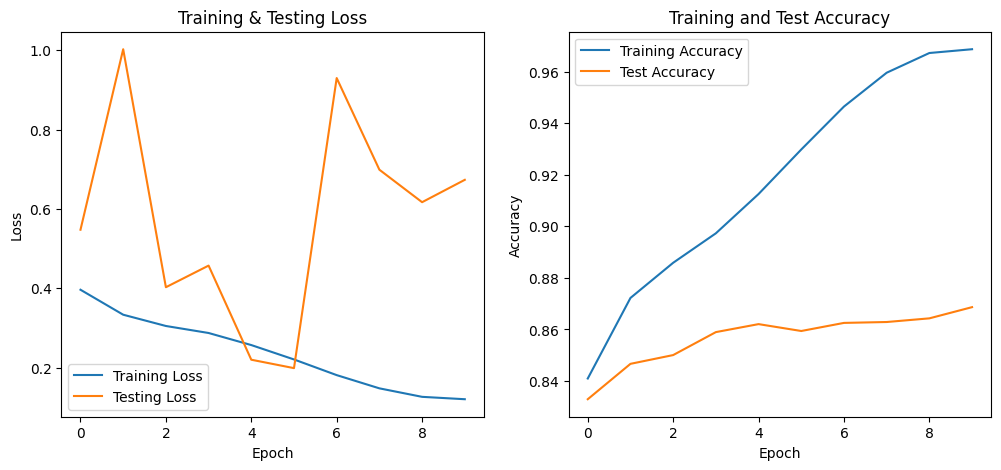

In [ ]:
import matplotlib.pyplot as plt

# 수정: 그래프 표시 부분이 코드에서 빠져 있어서 추가
plt.figure(figsize=(12, 5))

# Plotting training loss
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.title('Training & Testing Loss')
plt.xlabel('Epoch')  # 수정: x 축 레이블을 에폭으로 변경
plt.ylabel('Loss')
plt.legend()

# Plotting training and test accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epoch')  # 수정: x 축 레이블을 에폭으로 변경
plt.ylabel('Accuracy')
plt.legend()

plt.show()

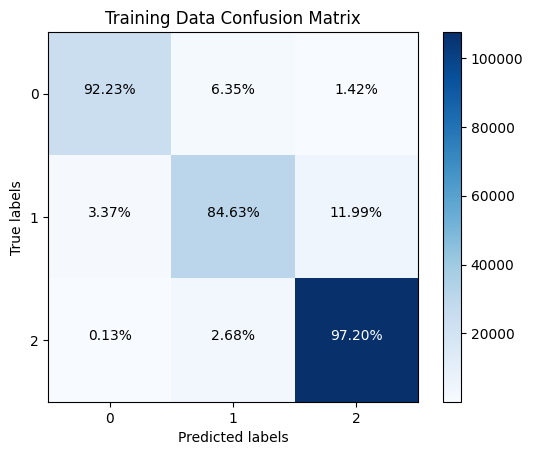

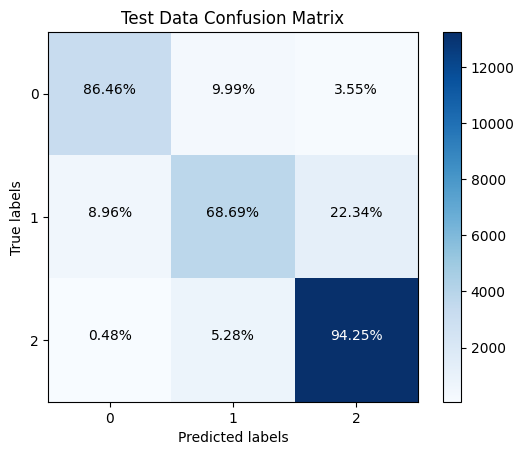

In [ ]:
def plot_confusion_matrix(cm, labels, title):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels)  # 가로로 표시되도록 rotation=90 설정
    plt.yticks(tick_marks, labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)

    # 각 칸의 백분율 값 표시
    total_samples = cm.sum(axis=1)[:, np.newaxis]  # 클래스별 전체 샘플 수
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(j, i, f'{cm[i, j] / total_samples[i][0]:.2%}', horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

    plt.show()

# 훈련 데이터셋 혼동 행렬 시각화
plot_confusion_matrix(train_conf_matrix, labels, title='Training Data Confusion Matrix')

# 테스트 데이터셋 혼동 행렬 시각화
plot_confusion_matrix(test_conf_matrix, labels, title='Test Data Confusion Matrix')
